## 동전 던지기
```
P(A) : 동전의 앞면이 나올 확률은 50 퍼센트라는 게 내 관점이다
P(A|X) : 동전을 던져보니 앞면이 나왔다. 난 이 증거 X에 굉장히 호들갑을 떨었고 그에 따라 앞면에 1.0 그리고 뒷면에 0.0 이라고 관점을 바꾸었다.

P(A) : 복잡스럽기 그지 없는 코드는 버그가 있을 법하다는 게 내 관점이다.
P(A|X) :  코드는 X테스트 케이스를 통과하였다; 버그가 있을 수는 있겠지만 의외로 없는 것은 아닐까라고 관점을 바꾸었다.

P(A) : 환자는 어떤 종류건 얼마나 되건 간에 질병을 가지고 있을거라는 게 내 관점이다.
P(A|X) : 혈액 검사를 해보니 증거X가 나왔다. 그에 따라서 어떤 질병들은 가지고 있지 않을 거라는게 내 관점이다.
```
모든 통계학 교재에는 동전 던지기 예제가 반드시 들어있다. 동전을 던지고 앞면이나 뒷면의 관측 결과를 기록한다. 이것이 관측 데이터다. 

`점점 더 많은 동전을 던지고 관측할수록 p에 대한 우리의 추론은 어떻게 변하는가`

더 구체적으로 질문하면 데이터가 많을 때와 데이터가 거의 없을 때를 비교할 경우 사후확률은 어떠한가? 다음으로 우리는 점점 더 많은 데이터(동전 던지기)를 관측하면서 점차 업데이트된 사후확률의 결과를 그래프로 나타낸다.

In [13]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

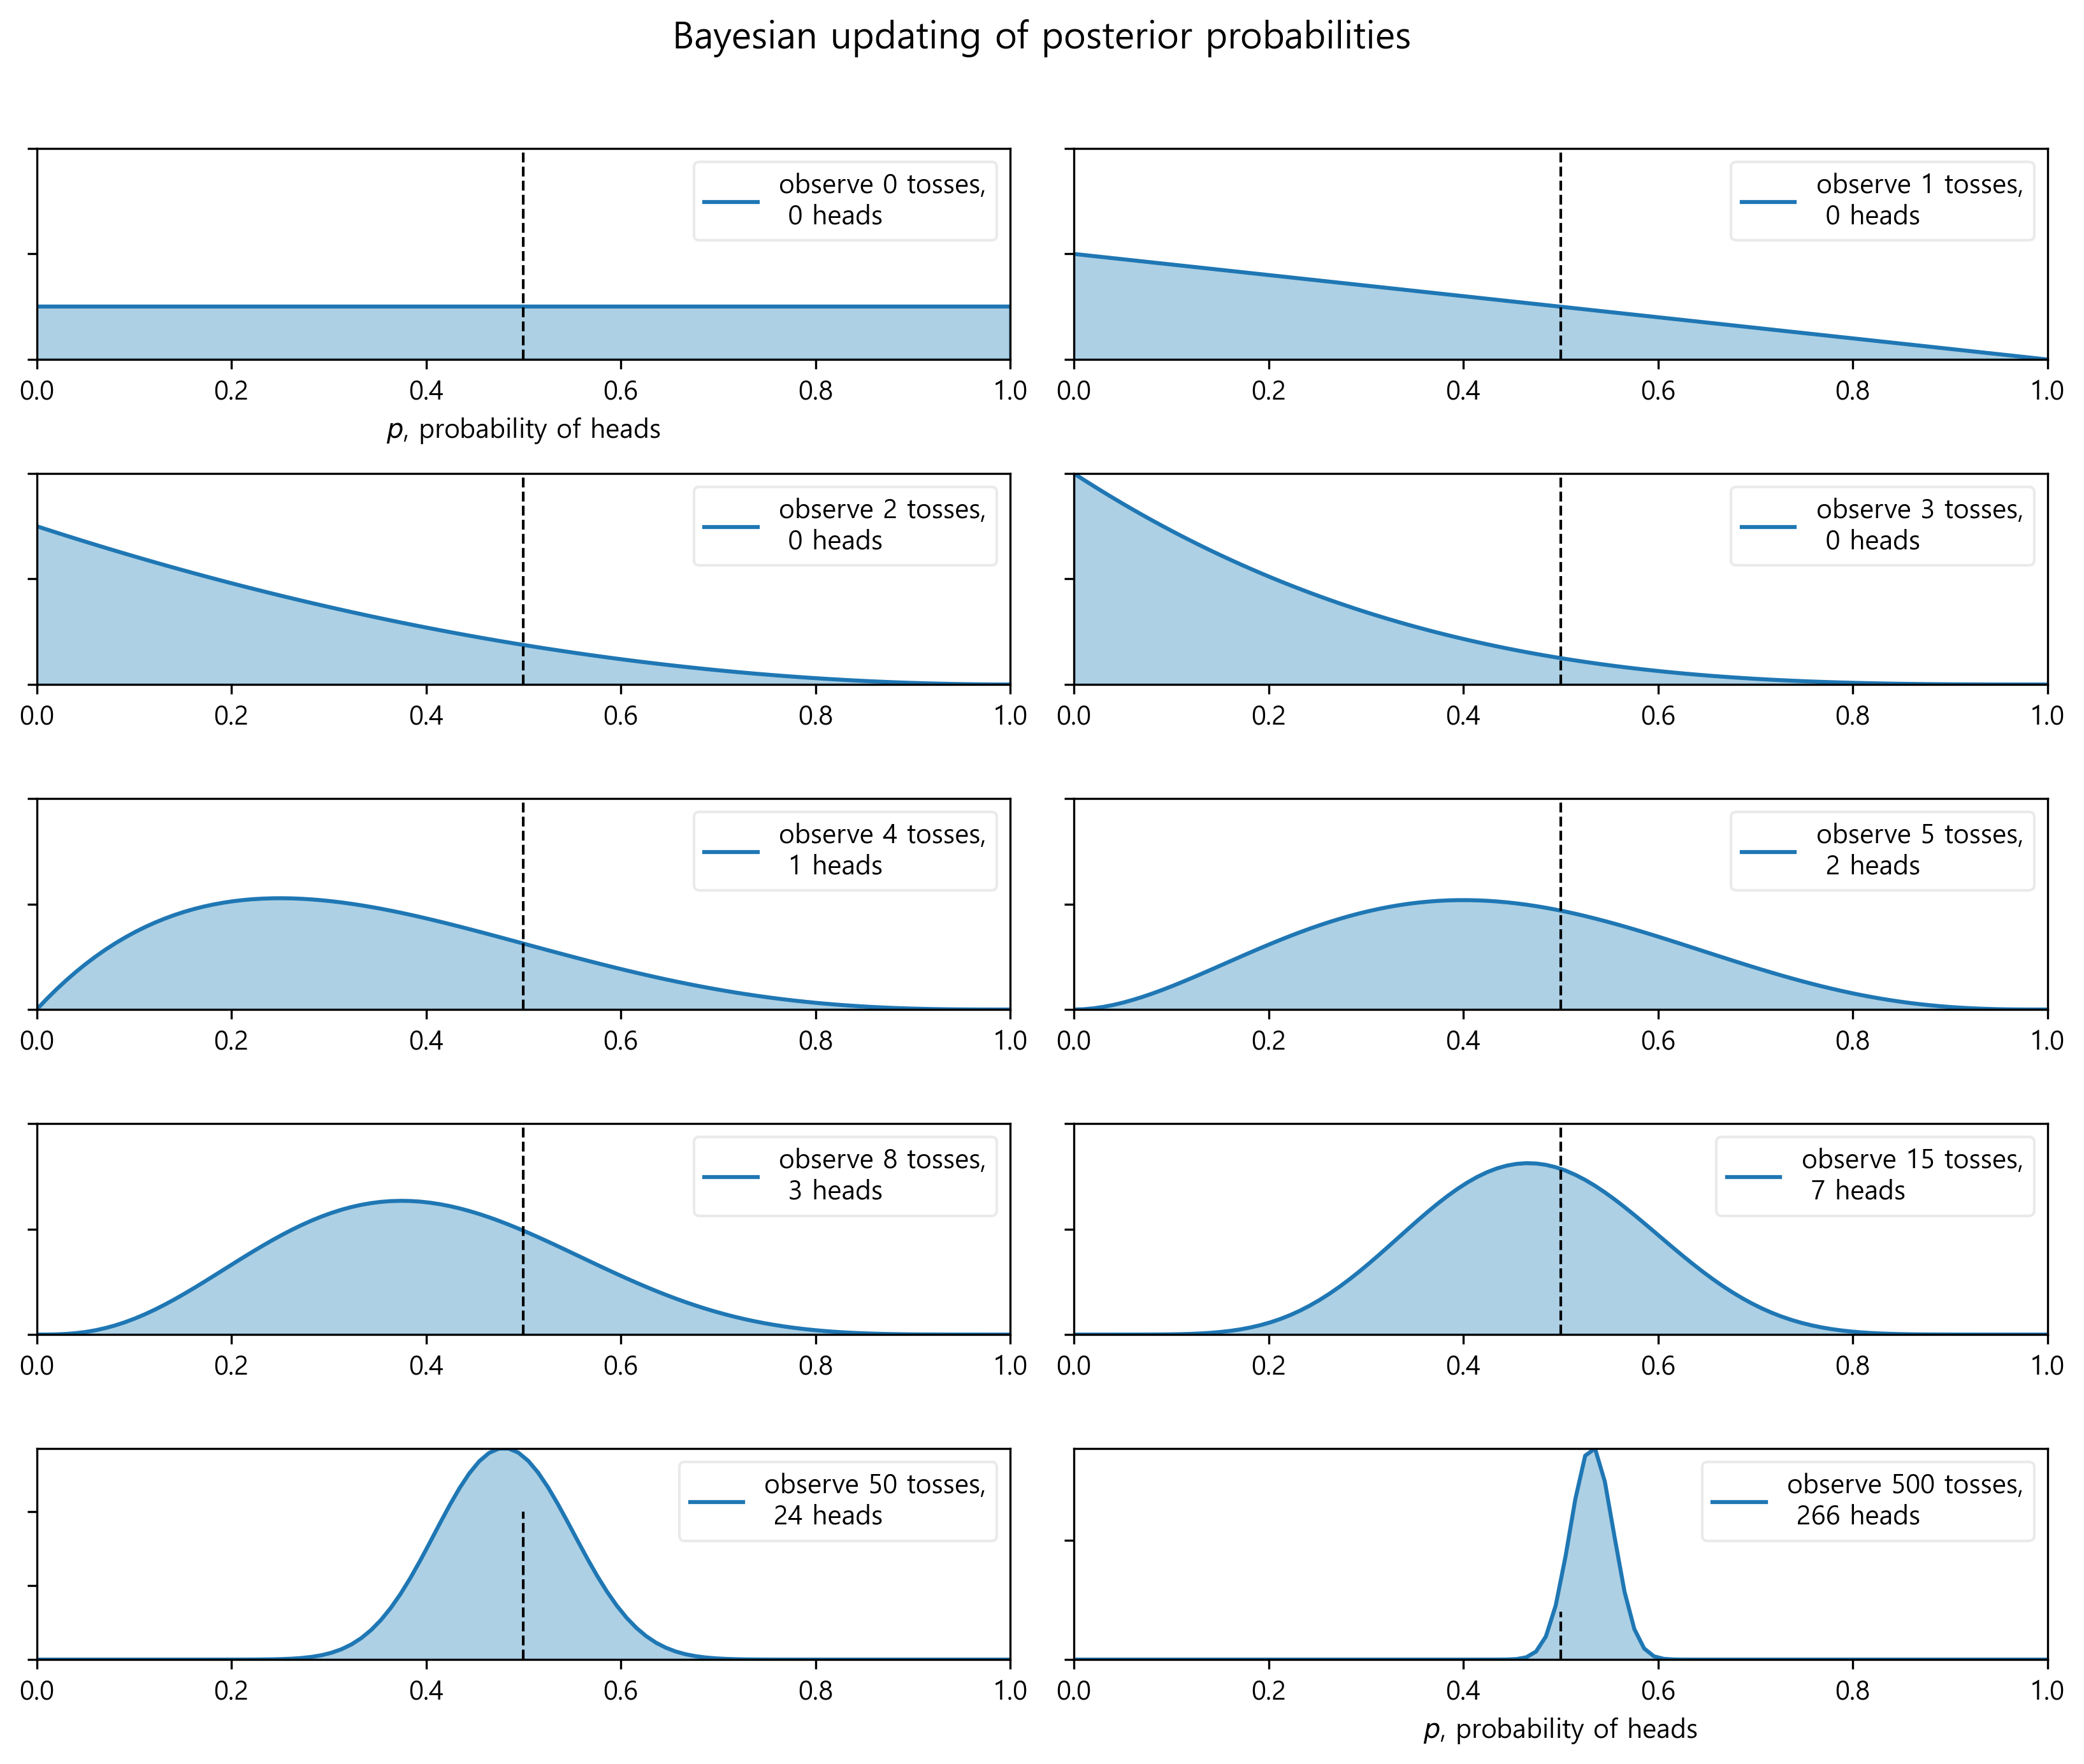

In [14]:
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

- 사후확률은 곡선으로 표시되고 불확실성은 곡선의 너비에 비례한다. 데이터를 관측할 수록 사후확률은 점점 이동한다.
- 결국 데이터(동전 던지기)를 더 많이 관측할 수록 확률은 p=0.5(점선으로 표시) 주변에 점점 가까워진다.
- 주목할 점은 곡선이 0.5에서 항상 뾰족한 것은 아니라는 점
- 극단적인 상황(8번 던져 앞면이 1번 나옴)이 관측된다면 분포는 0.5에서 벗어나 편향되어 보일 것이다.
- 더 많은 데이터가 누적될 수록 전부 그런건 아니지만 p=0.5일 확률이 점점 더 커진다.

## 사서일까 농부일까

$ P(A|X)=P(X|A)P(A)\over{P(X)}$



Text(0.5, 1.0, 'Are there bugs in my code?')

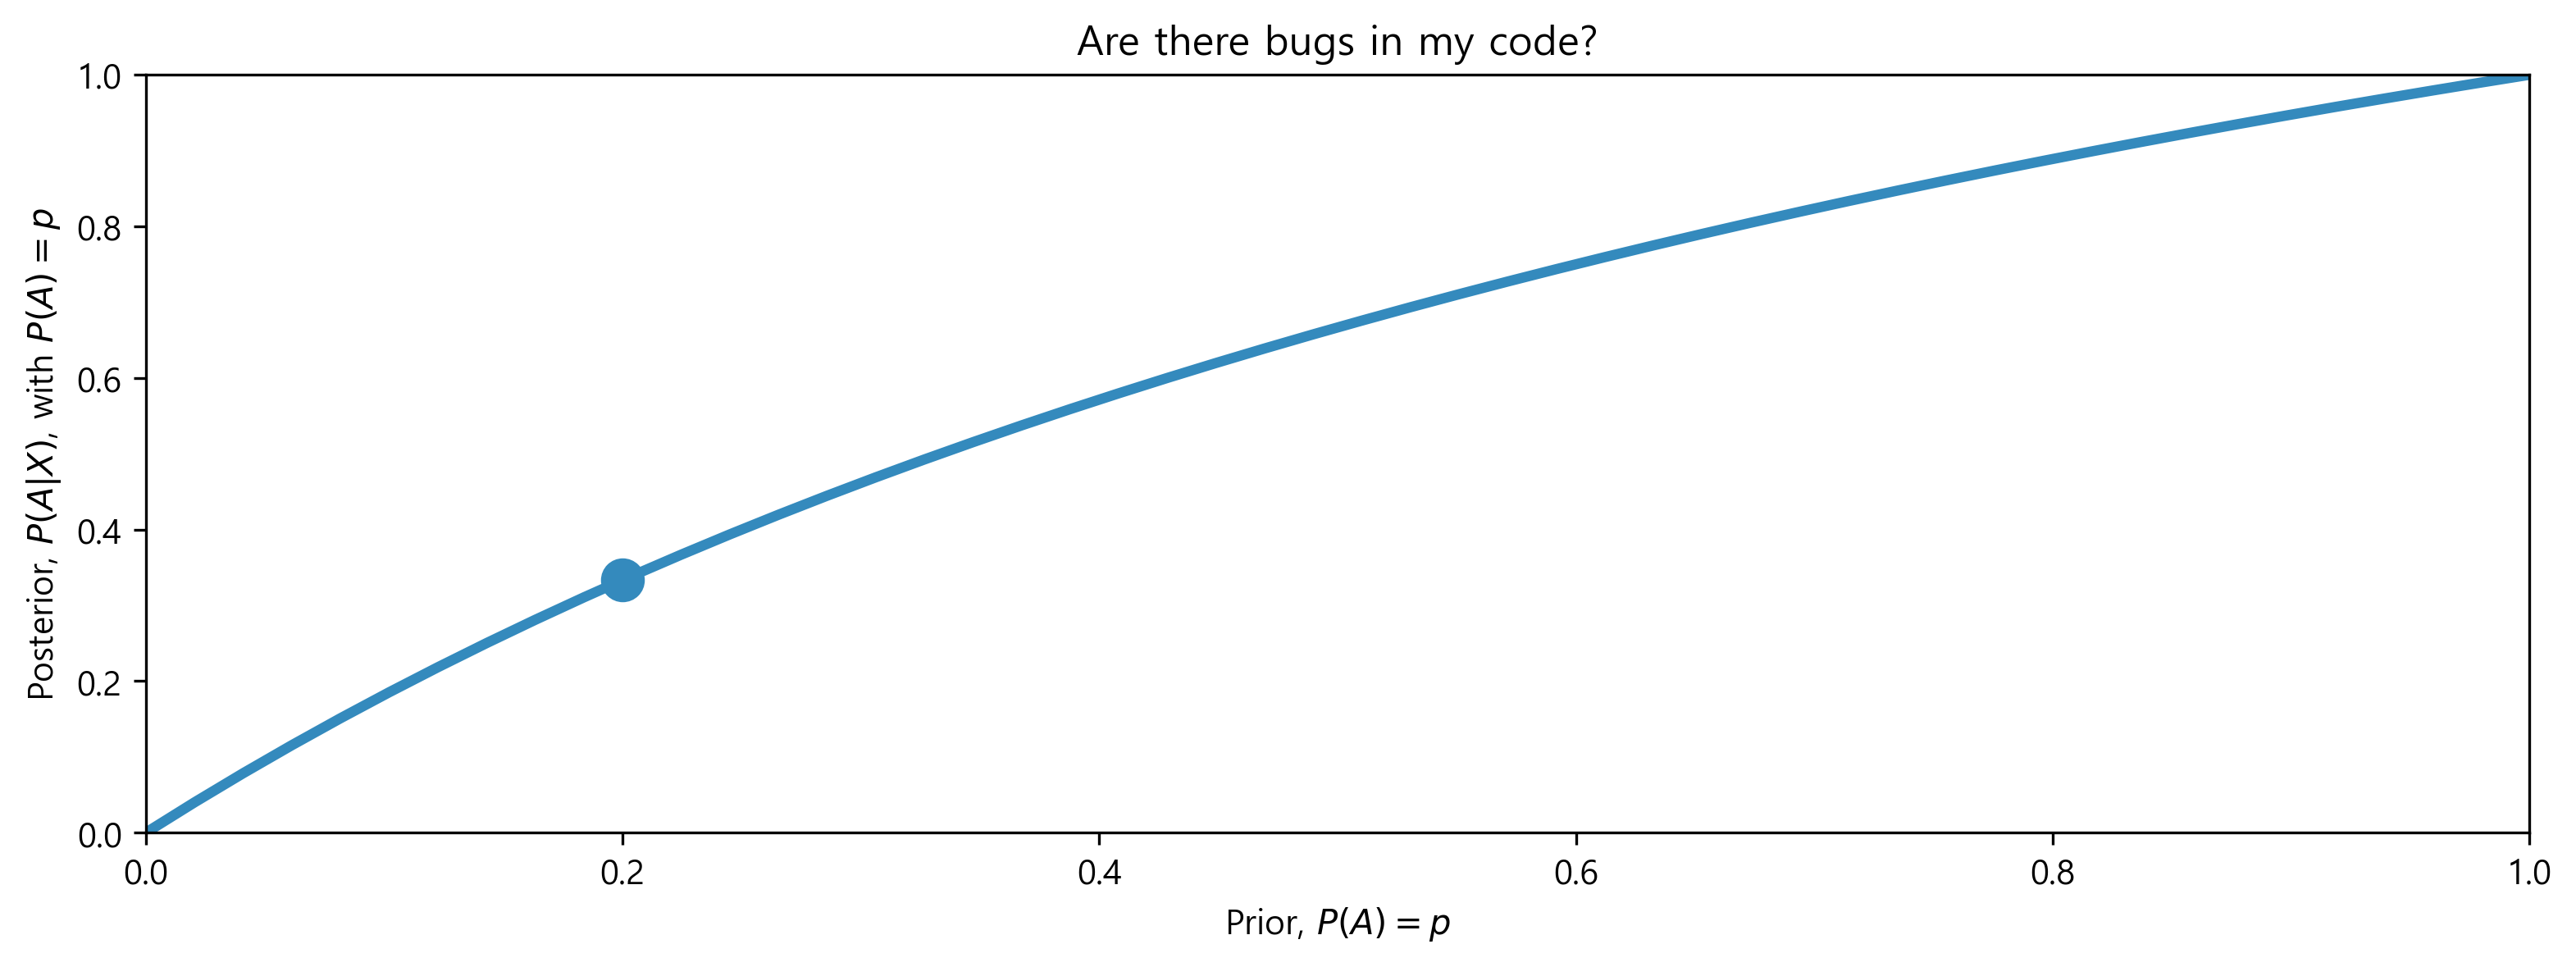

In [15]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?")

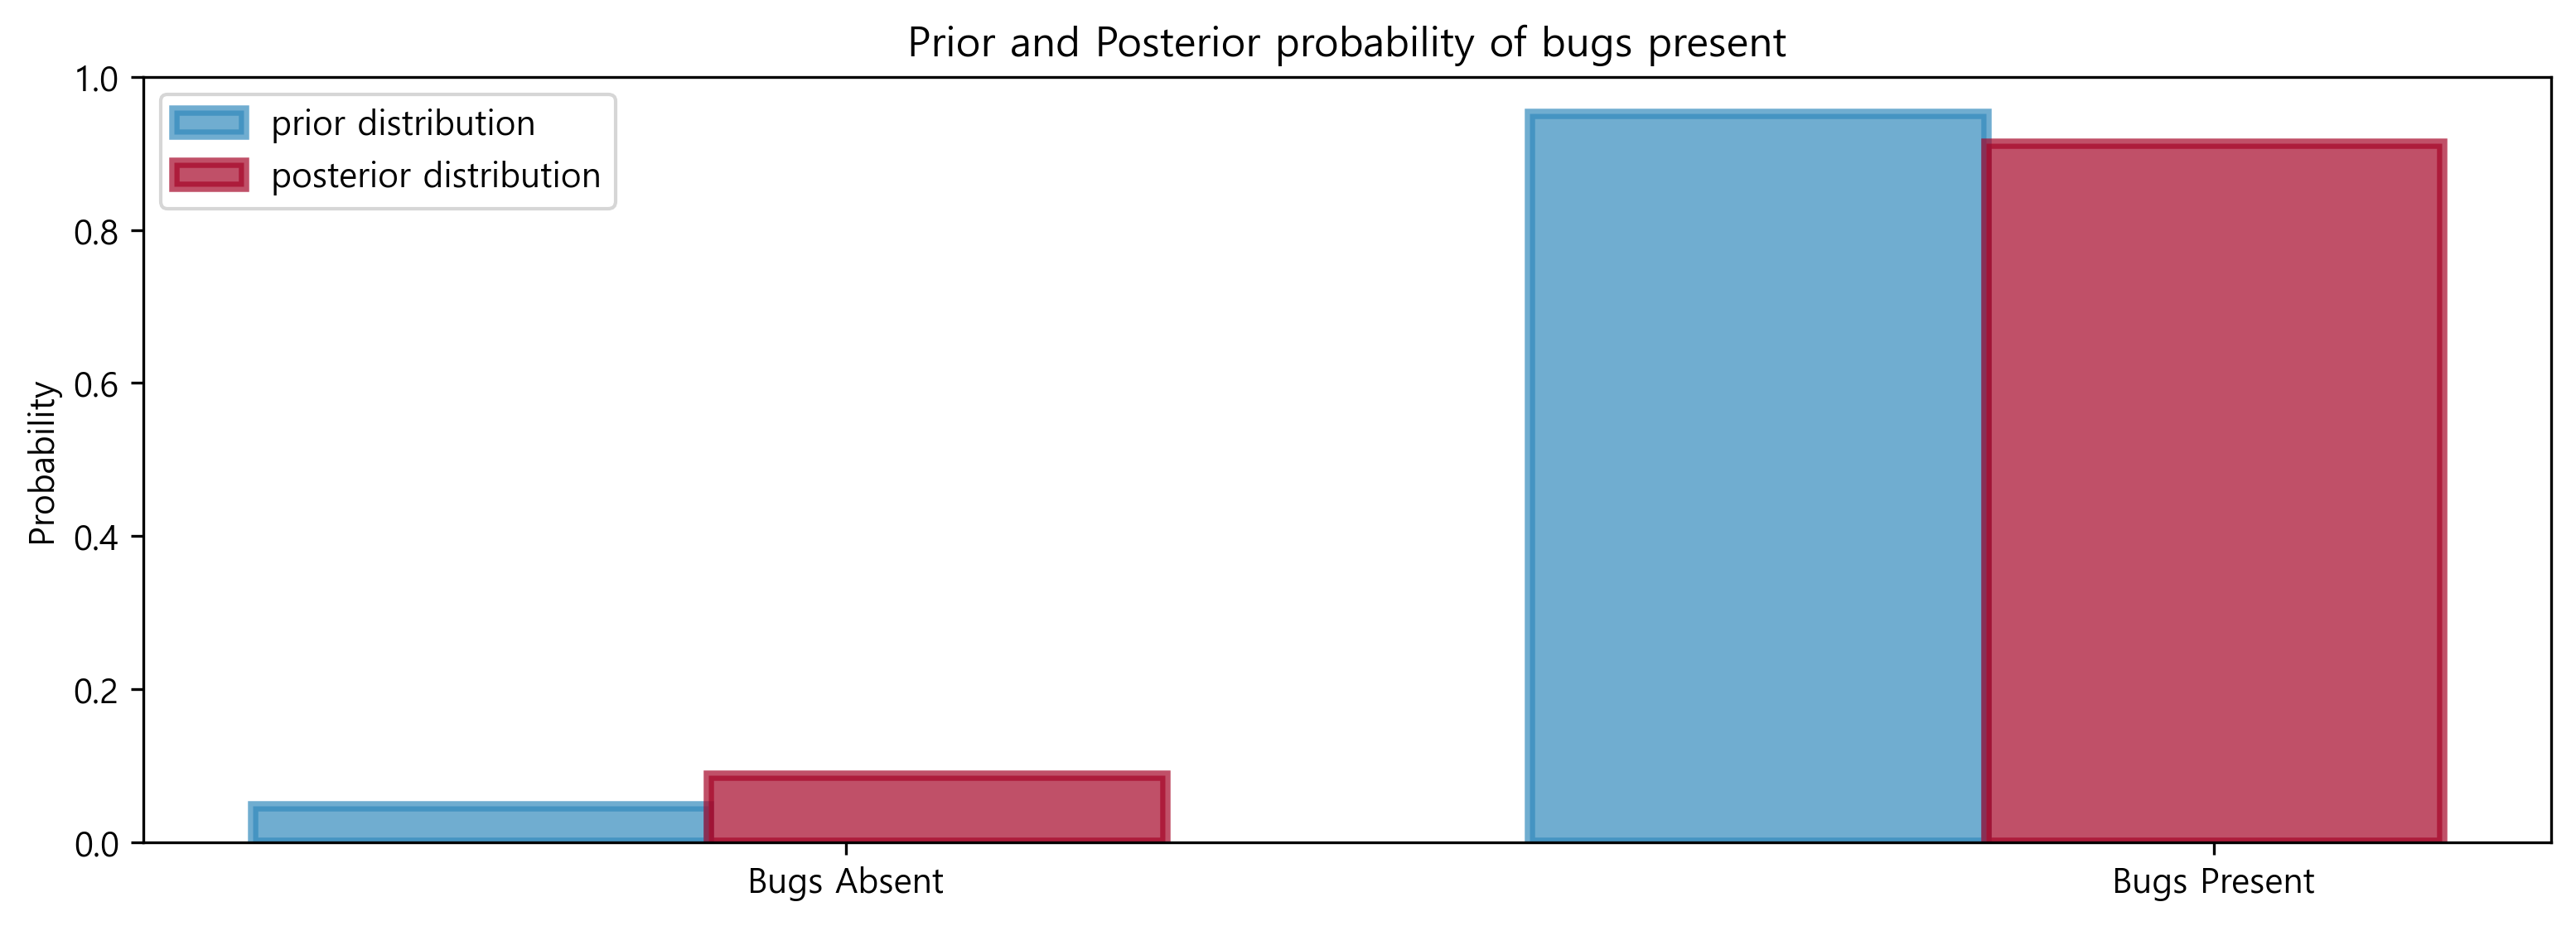

In [16]:
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ["#348ABD", "#A60628"]

prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colors[0], label="prior distribution",
        lw=3, edgecolor=colors[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colors[1],
        label="posterior distribution",
        lw=3, edgecolor=colors[1])

plt.xticks([0.20, 0.95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Text(0.5, 1.0, 'Probability mass function of a Poisson random variable; differing $\\lambda$ values')

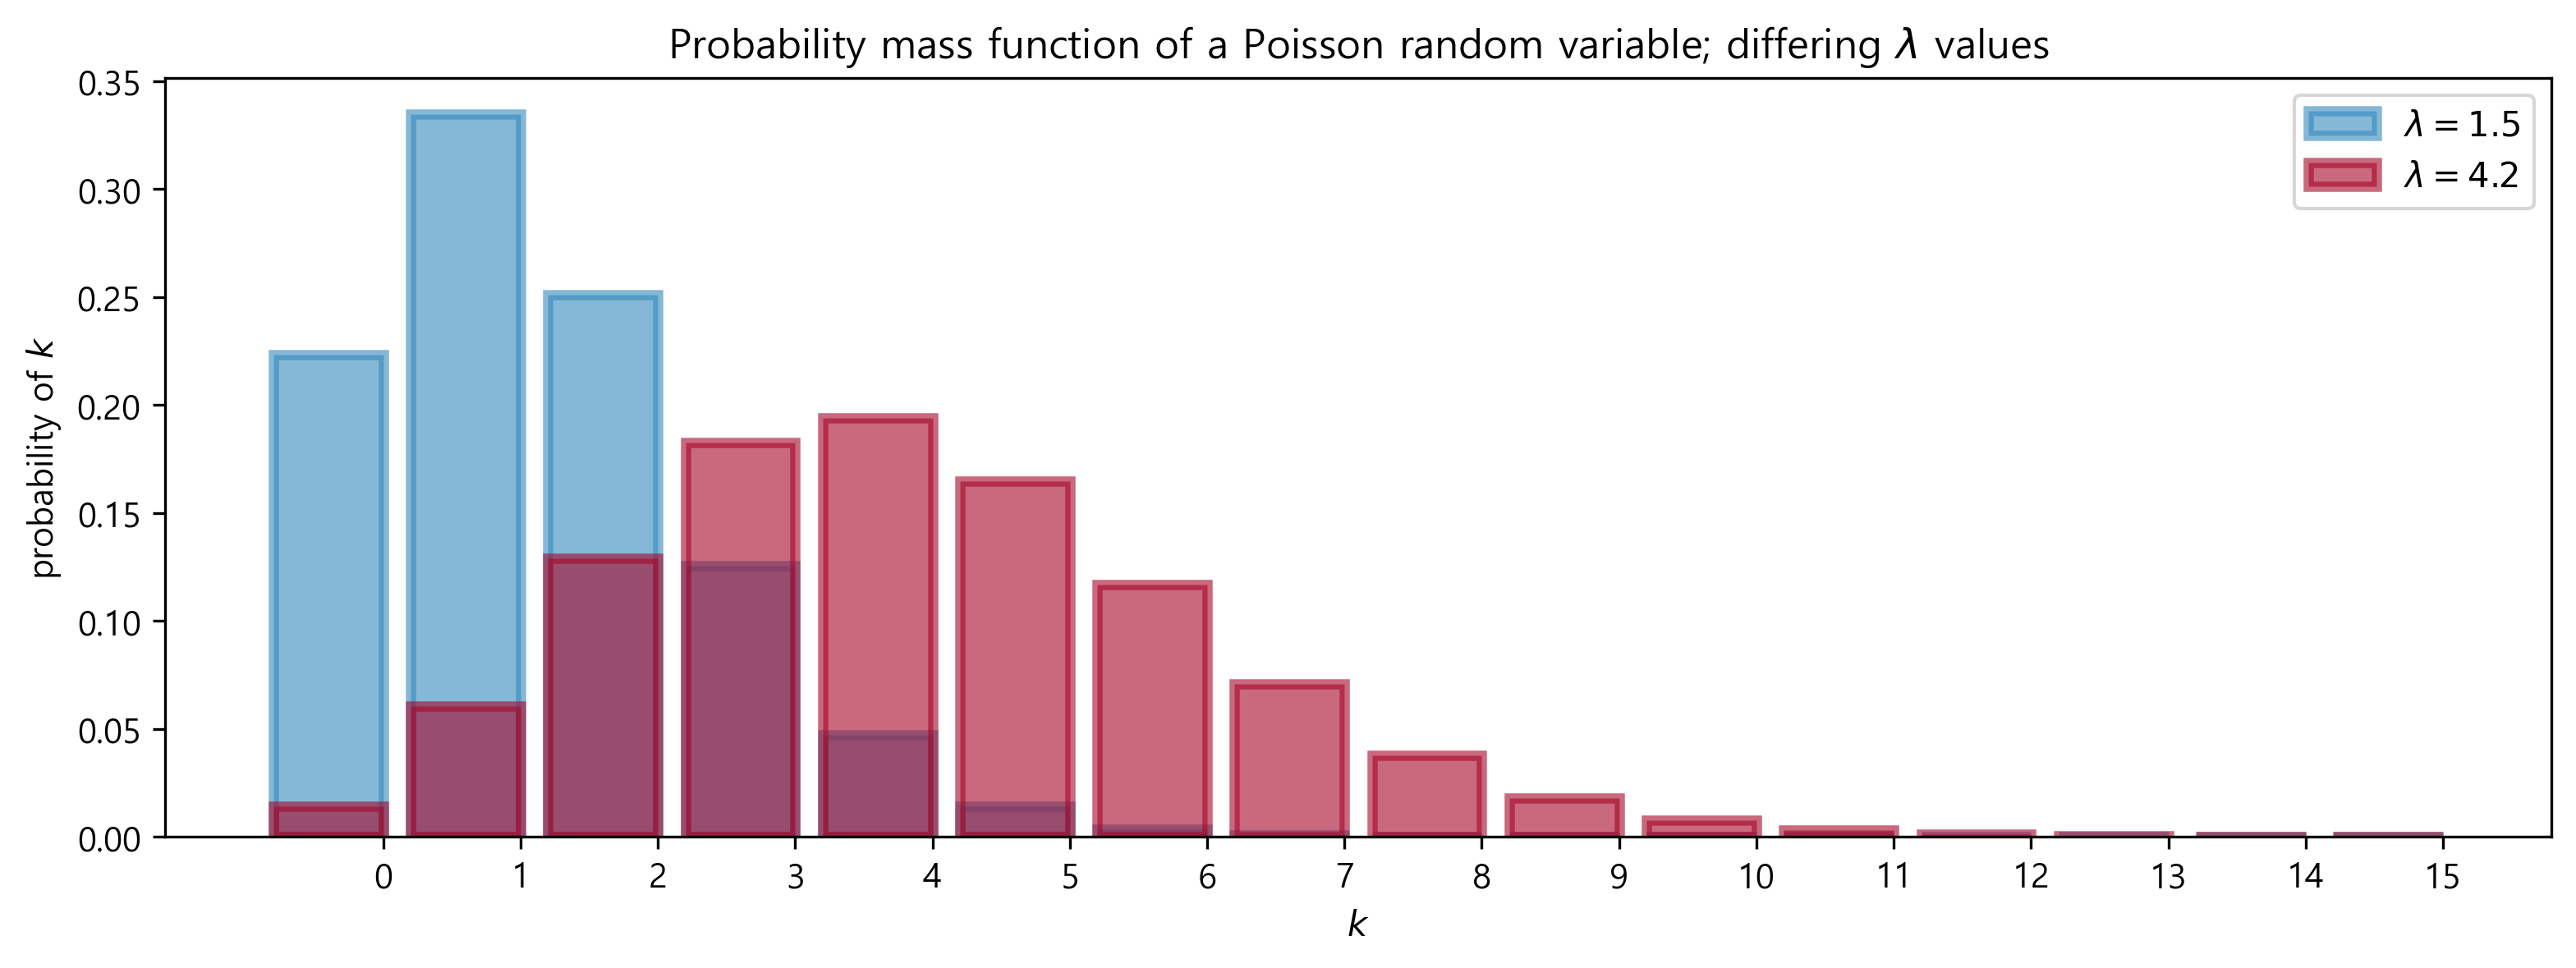

In [17]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw=3)

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw=3)

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")